In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [2]:
!pip install  pomegranate;
import pomegranate
from random import shuffle
import numpy as np
import pandas as pd
from scipy.special import logsumexp
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import more_itertools
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.1 MB/s eta 0:00:00
  Created wheel for apricot-select: filename=apricot_select-0.6.1-py3-none-any.whl size=48764 sha256=8b7c0b5c7d3cf5d469f999fa29cc95e41f38c5bd6812d8323c61236349789c33
  Stored in directory: /root/.cache/pip/wheels/df/d8/f9/4d62b7272bff772a126a52e507212c2fd33c0b8416d9389665
Successfully built apricot-select


# Maneuver Recognition Pygame

## Data Visualization

Number of Series = 300
Lenght of each series 89


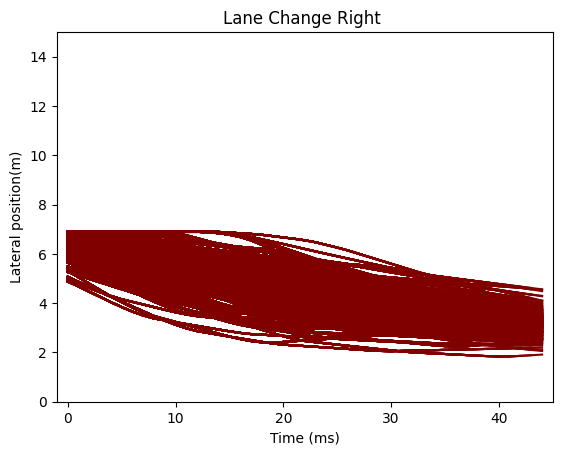

In [3]:
l_c_l=open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Left_Maneuvers.csv','r')
D = [s.split(',') for s in l_c_l.readlines()]#
Data=[[]]
count=0
for i in D:
    if i[0]=='Lateral_Position':
        Data.append([])
        count=count+1
        continue

    Data[count].append(i)
# print(Data[0])
N = len(Data)
print("Number of Series =",N)
for j in range(N):
    Data[j] = np.array([[float(k) for k in data] for data in Data[j]])
# print(Data.ndim)
T = np.min([d.shape[0] for d in Data])
print("Lenght of each series",T)
for j in range(N):
    Data[j] = Data[j][16:61]
    #Data[j] = Data[j][-T:]
    df = pd.DataFrame(Data[j],columns=['Lateral_Position','Velocity','Acceleration'])
def Plot(state, title='', xlab='', ylab='',axis=[]):
    """
    state=Lateral position=0,Lateral velocity=1,Longitudinal velocity=2,acceleration=3,steer angle=4
    axis=args must contain [xmin xmax ymin ymax] min=[4 -6 -10 4 -30],max=[11 0 -10 5 30]
    """
    fig = plt.figure()   #fig = plt.figure(figsize=(10,5))
    plt.axis(axis)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    ave=[]
    for i in range(N):
        s=[]
        for j in range(45):
            s.append(Data[i][j][state])
            plt.plot(range(len(s)), s,color='maroon')
            ave.append(s)
Plot(state=0, title='Lane Change Right ', xlab='Time (ms)',ylab='Lateral position(m)',axis=[-1, 45,0, 15])

## Data Preprocessing

In [4]:
l_c_l = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Left_Maneuvers.csv','r')
l_c_r = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Right_Maneuvers.csv','r')
l_k   = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Straight_Maneuvers.csv','r')
def Data_prepration(Data_type):
    D = [s.split(',') for s in Data_type.readlines()]
    Data=[[]]
    count=0
    for i in D:
        if i[0]=='Lateral_Position':
            Data.append([])
            count=count+1
            continue

        Data[count].append(i)
#print(Data)
    N = len(Data)
    Number = len(Data)
    print("Number of Series =",N)
    for j in range(N):
        Data[j] = np.array([[float(k) for k in data] for data in Data[j]])

    #T = np.min([d.shape[0] for d in Data])
    T=89

    List_of_series=[]
    for j in range(N):
        Data[j] = Data[j][16:61]
        #Data[j] = Data[j][-T:]
        df = pd.DataFrame(Data[j],columns=['Lateral_Position','Velocity','Acceleration'])
        List_of_series.append(df)

    print(List_of_series[1].shape)

    X=List_of_series
    return(X)
l_k=Data_prepration(l_k)
l_c_l=Data_prepration(l_c_l)
l_c_r=Data_prepration(l_c_r)
print(type(l_c_r))
print("Length of l_c_r = ",len(l_c_r))
print("Length of l_c_l = ",len(l_c_l))
print("Length of l_k = ",len(l_k))
shuffle(l_k)
shuffle(l_c_r)
shuffle(l_c_l)
print(type(l_c_r))
l_c_r_Train=l_c_r[0:120]
l_c_r_Test=l_c_r[120:150]
l_c_l_Train=l_c_l[0:120]
l_c_l_Test=l_c_l[120:150]
l_k_Train=l_k[0:120]
l_k_Test=l_k[120:150]

print("Length of l_c_r = ",len(l_c_r_Train))
print("Length of l_c_l = ",len(l_c_l_Train))
print("Length of l_k = ",len(l_k_Train))
print("Length of l_c_r = ",len(l_c_r_Test))
print("Length of l_c_l = ",len(l_c_l_Test))
print("Length of l_k = ",len(l_k_Test))
print(type(l_c_r_Train),type(l_c_l_Train),type(l_c_r_Test),type(l_c_l_Test),type(l_k_Train),type(l_k_Test))

Number of Series = 300
(45, 3)
Number of Series = 300
(45, 3)
Number of Series = 300
(45, 3)
<class 'list'>
Length of l_c_r =  300
Length of l_c_l =  300
Length of l_k =  300
<class 'list'>
Length of l_c_r =  120
Length of l_c_l =  120
Length of l_k =  120
Length of l_c_r =  30
Length of l_c_l =  30
Length of l_k =  30
<class 'list'> <class 'list'> <class 'list'> <class 'list'> <class 'list'> <class 'list'>


## HMM Model

In [11]:
import math
from pomegranate import *
# BIC_l_k=[]
# BIC_l_c_r=[]
# BIC_l_c_l=[]
def gmmhmm(state_number,X):
    model = HiddenMarkovModel.from_samples(NormalDistribution, n_components=5, X=X)
    Model_c=HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=state_number, X=X)
    Model1=Model_c.fit(X,algorithm='baum-welch')
    return Model1

for i in range(2,16):
    l_k=gmmhmm(i,l_k_Train)
    l_kk=np.max([l_k.log_probability(sequence)for sequence in l_k_Train])
    l_c_r=gmmhmm(i,l_c_r_Train)
    l_cr=np.max([l_c_r.log_probability(sequence) for sequence in l_c_r_Train])
    l_c_l=gmmhmm(i,l_c_l_Train)
    l_cl=np.max([l_c_l.log_probability(sequence) for sequence in l_c_l_Train])
    p=i^2+26*i-1
    l_k_p=(-2*l_kk+p*math.log(45))
    l_c_r_p=(-2*l_cr+p*math.log(45))
    l_c_l_p=(-2*l_cl+p*math.log(45))
    # print(l_k_p,l_c_r_p,l_c_l_p)

NameError: ignored

In [9]:
import math
#from pomegranate import *
import pomegranate
BIC_l_k=[]
BIC_l_c_r=[]
BIC_l_c_l=[]
Logliklihood_l_k=[]
Logliklihood_l_c_r=[]
Logliklihood_l_c_l=[]
def gmmhmm(state_number,X):
    Model_c=HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=state_number, X=X)
    Model1=Model_c.fit(X,algorithm='baum-welch')
    return Model1
### BIC = −2 log L(λ|O) + p log(T ),        p = p(λ) = N**2 − 1 + N*(M − 1).

### T is the length of each sequence & in my thesis is: 45
### N is the number of states
### M is the number of observation and mine is: 36
#---> 3 mixtures of Gaussians with zero covariance so 3(observations)x(3(Gaussian coefficient )+(3x3)(diagonal num of 3 mixtures))

for i in range(1,16):
    l_k=gmmhmm(i,l_k_Train)
    l_kk=np.sum([l_k.log_probability(sequence)for sequence in l_k_Train])
    l_c_r=gmmhmm(i,l_c_r_Train)
    l_cr=np.sum([l_c_r.log_probability(sequence) for sequence in l_c_r_Train])
    l_c_l=gmmhmm(i,l_c_l_Train)
    l_cl=np.sum([l_c_l.log_probability(sequence) for sequence in l_c_l_Train])
    p=i^2+35*i-1
    l_k_p  =(-2*l_kk+p*math.log(45))
    l_c_r_p=(-2*l_cr+p*math.log(45))
    l_c_l_p=(-2*l_cl+p*math.log(45))

    BIC_l_k.append(l_k_p)
    BIC_l_c_r.append(l_c_r_p)
    BIC_l_c_l.append(l_c_l_p)
    Logliklihood_l_k.append(l_kk)
    Logliklihood_l_c_r.append(l_cr)
    Logliklihood_l_c_l.append(l_cl)
    # print(i)
    # print("BIC          ",l_k_p,"  ",l_c_r_p,"  ",l_c_l_p)
    #print("Logliklihood ",l_kk,"  ",l_cr,"  ",l_cl)


NameError: ignored

36761.76076585389 -21739.429722732715
50171.67086768253 -8242.424280049192
48180.46266822647 -23623.374715359485


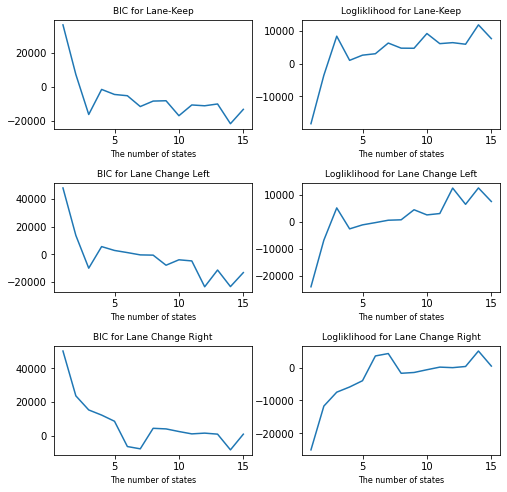

In [ ]:
import matplotlib.pyplot as plt
print(max(BIC_l_k),min(BIC_l_k))
print(max(BIC_l_c_r),min(BIC_l_c_r))
print(max(BIC_l_c_l),min(BIC_l_c_l))
plt.figure(figsize=(8,8))
plt.subplot(3,2,1)
plt.title('BIC for Lane-Keep', fontsize=9)
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], BIC_l_k)
plt.xlabel('The number of states', fontsize=8)


plt.subplot(3,2,3)
plt.title('BIC for Lane Change Left', fontsize=9)
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], BIC_l_c_l)
plt.xlabel('The number of states', fontsize=8)


plt.subplot(3,2,5)
plt.title('BIC for Lane Change Right', fontsize=9)
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], BIC_l_c_r)
plt.xlabel('The number of states', fontsize=8)


# plt.subplots_adjust(hspace=1, wspace=1.0)
# plt.show()

################################################################################################

# figure(figsize=(8,8))
plt.subplot(3,2,2)
plt.title('Logliklihood for Lane-Keep' , fontsize=9)
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], Logliklihood_l_k)
plt.xlabel('The number of states', fontsize=8)

plt.subplot(3,2,4)
plt.title('Logliklihood for Lane Change Left', fontsize=9)
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], Logliklihood_l_c_l)
plt.xlabel('The number of states', fontsize=8)


plt.subplot(3,2,6)
plt.title('Logliklihood for Lane Change Right', fontsize=9)
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], Logliklihood_l_c_r)
plt.xlabel('The number of states', fontsize=8)


plt.subplots_adjust(hspace=.5, wspace=.25)
plt.show()

In [ ]:
from pomegranate import *
from matplotlib import pyplot as plt

## Modeling
## from_samples method to learn both the structure and distributions directly from data
## n_components=number of hidden states,X=data
Model_1= HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=3, X=l_k_Train)
Model_2= HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=5, X=l_c_l_Train)
Model_3= HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=5, X=l_c_r_Train)

##Fitting
Lane_Keep_Model=Model_1.fit(l_k_Train,algorithm='baum-welch',verbose=True,labels=np.full((60), "Lane Keep"))
Lane_Change_Model_Left=Model_2.fit(l_c_l_Train,algorithm='baum-welch',verbose=True,labels=np.full((60), "Change Left"))
Lane_Change_Model_Right=Model_3.fit(l_c_r_Train,algorithm='baum-welch',verbose=True,labels=np.full((60), "Change Right"))


[1] Improvement: 8965.099239291905	Time (s): 0.1102
[2] Improvement: -8911.538600775155	Time (s): 0.06782
Total Training Improvement: 53.56063851675026
Total Training Time (s): 0.2656
[1] Improvement: -122.31682802702198	Time (s): 0.1608
Total Training Improvement: -122.31682802702198
Total Training Time (s): 0.2816
[1] Improvement: 63.20430852351819	Time (s): 0.08594
[2] Improvement: 7279.968765583595	Time (s): 0.05565
[3] Improvement: -7099.85099140687	Time (s): 0.04271
Total Training Improvement: 243.3220827002433
Total Training Time (s): 0.3244


## Save HMM

In [12]:
import pickle
pickle.dump(Lane_Keep_Model, open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /LK_HMM.bin', 'wb'))
pickle.dump(Lane_Change_Model_Left, open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /LCL_HMM.bin', 'wb'))
pickle.dump(Lane_Change_Model_Right, open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /LCR_HMM.bin', 'wb'))

NameError: ignored

In [ ]:
print(Lane_Keep_Model.forward(l_c_r_Test[0]))
print(Lane_Keep_Model.forward(l_c_r_Test[0])[-1])
print(Lane_Change_Model_Left.forward(l_c_r_Test[0])[-1])
print(Lane_Change_Model_Right.forward(l_c_r_Test[0])[-1])
print(type(Lane_Keep_Model))

[[     -inf      -inf      -inf  0.00e+00      -inf]
 [-1.31e+02 -3.28e+00      -inf      -inf      -inf]
 [-1.23e+02 -4.56e+00 -3.90e+07      -inf      -inf]
 [-1.10e+02 -5.73e+00 -4.54e+07      -inf      -inf]
 [-9.93e+01 -6.87e+00 -5.14e+07      -inf      -inf]
 [-1.34e+02 -8.66e+00 -6.20e+07      -inf      -inf]
 [-1.30e+02 -1.06e+01 -7.36e+07      -inf      -inf]
 [-1.17e+02 -1.24e+01 -8.50e+07      -inf      -inf]
 [-1.23e+02 -1.47e+01 -9.85e+07      -inf      -inf]
 [-1.20e+02 -1.72e+01 -1.13e+08      -inf      -inf]
 [-1.09e+02 -1.98e+01 -1.27e+08      -inf      -inf]
 [-9.98e+01 -2.25e+01 -1.40e+08      -inf      -inf]
 [-9.20e+01 -2.53e+01 -1.52e+08      -inf      -inf]
 [-1.15e+02 -2.91e+01 -1.70e+08      -inf      -inf]
 [-1.06e+02 -3.30e+01 -1.87e+08      -inf      -inf]
 [-1.14e+02 -3.76e+01 -2.07e+08      -inf      -inf]
 [-1.08e+02 -4.24e+01 -2.25e+08      -inf      -inf]
 [-1.03e+02 -4.75e+01 -2.43e+08      -inf      -inf]
 [-9.96e+01 -5.29e+01 -2.58e+08      -inf     

## HMM Confusion Matrix

lengh of all test data :  90
[[30  0  0]
 [ 0 30  0]
 [ 0  0 30]]


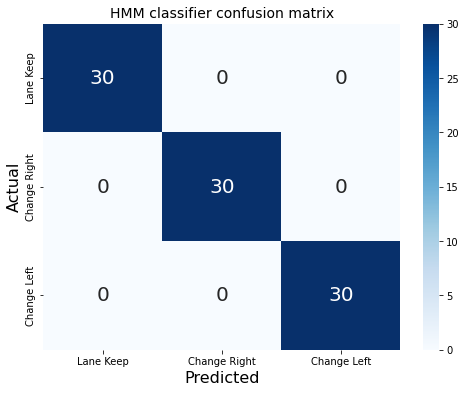

In [ ]:
# l_k_Test
# l_c_l_Test
# l_c_r_Test
list_l_k_Test=[[]]
count=0
for i in l_k_Test:
    #print("D")
    #print(list_l_k_Test)
    list_l_k_Test[count].append(i)
    list_l_k_Test[count].append("Lane Keep")
    list_l_k_Test.append([])
    count=count+1


#print(len(list_l_k_Test))
#print(list_l_k_Test[20])
list_l_k_Test = list_l_k_Test[:-1]
#print(len(list_l_k_Test))
#####################
list_l_c_l_Test=[[]]
count=0
for i in l_c_l_Test:
    #print("D")
    #print(list_l_k_Test)
    list_l_c_l_Test[count].append(i)
    list_l_c_l_Test[count].append("Change Left")
    list_l_c_l_Test.append([])
    count=count+1


#print(len(list_l_c_l_Test))
#print(list_l_c_l_Test[20])
list_l_c_l_Test = list_l_c_l_Test[:-1]
#print(len(list_l_c_l_Test))
############################
list_l_c_r_Test=[[]]
count=0
for i in l_c_r_Test:
    #print("D")
    #print(list_l_k_Test)
    list_l_c_r_Test[count].append(i)
    list_l_c_r_Test[count].append("Change Right")
    list_l_c_r_Test.append([])
    count=count+1


#print(len(list_l_c_r_Test))
#print(list_l_c_r_Test[20])
list_l_c_r_Test = list_l_c_r_Test[:-1]
#print(len(list_l_c_r_Test))

All_Test = list_l_c_r_Test + list_l_k_Test + list_l_c_l_Test
print("lengh of all test data : ",len(All_Test))
shuffle(All_Test)


from sklearn.metrics import confusion_matrix
y_true = []
y_pred = []
L_K=[]
L_C_R=[]
L_C_L=[]
for i in range(len(All_Test)):
    Turn_Left=Lane_Change_Model_Left.log_probability(All_Test[i][0])
    L_C_L.append(Turn_Left)
    Turn_Right=Lane_Change_Model_Right.log_probability(All_Test[i][0])
    L_C_R.append(Turn_Right)
    straight=Lane_Keep_Model.log_probability(All_Test[i][0])
    L_K.append(straight)
    y_true.append(All_Test[i][1])

    #print('Likelihoods for Lane_Change_Left_Model =',Turn_Left)
    #print('Likelihoods for Lane_Change_Right_Model =',Turn_Right)
    #print('Likelihoods for Lane_Keep_Model =',straight)

    if (Turn_Left>Turn_Right) and (Turn_Left> straight):
        #print("###Prediction = Lane_Change_Left")
        y_pred.append("Change Left")
    elif (Turn_Right>Turn_Left) and (Turn_Right> straight):
        #print("###Prediction = Lane_Change_Right")
        y_pred.append("Change Right")
    elif (straight>Turn_Left) and (straight> Turn_Left):
        #print("###3Prediction = Lane_Keep")
        y_pred.append("Lane Keep")

#print(len(L_K),len(L_C_R),len(L_C_L))

import matplotlib.pyplot as plt
import seaborn
labels = ["Lane Keep", "Change Right","Change Left"]
conf_mat =confusion_matrix(y_true, y_pred)
print(conf_mat)
fig, ax = plt.subplots(figsize=(8,6))
seaborn.heatmap(conf_mat, annot=True, fmt='d',annot_kws={'fontsize': 20},cmap = "Blues"
                ,xticklabels=labels,yticklabels=labels)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.ylabel('Actual',fontsize=16)
plt.xlabel('Predicted',fontsize=16)
plt.title('HMM classifier confusion matrix',fontsize=14)
plt.show()

Confusion matrix, without normalization
[[30  0  0]
 [ 0 30  0]
 [ 0  0 30]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


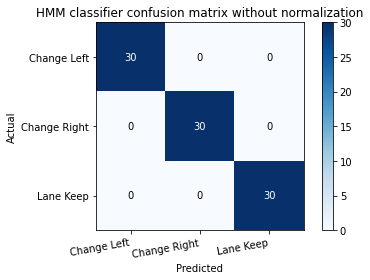

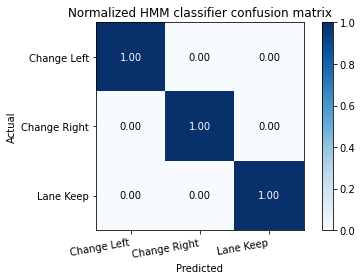

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.pyplot import *
class_names = ["Lane Keep", "Change Right","Change Left"]

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes #= [0, 1, 2]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual',
           xlabel='Predicted')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=10 , ha="right",
             )

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=["Change Left","Change Right","Lane Keep"],
                      title='HMM classifier confusion matrix without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=["Change Left","Change Right","Lane Keep"] , normalize=True,
                      title='Normalized HMM classifier confusion matrix')
plt.show()

In [ ]:
def accuracy(conf_mat):
    diagonal_sum = conf_mat.trace()
    sum_of_all_elements = conf_mat.sum()
    return diagonal_sum / sum_of_all_elements

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_true, y_pred)

In [ ]:
print('accuracy = ',accuracy(conf_mat))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy =  1.0
precision: [1. 1. 1.]
recall: [1. 1. 1.]
fscore: [1. 1. 1.]
support: [30 30 30]


## Sample Test Probabilities

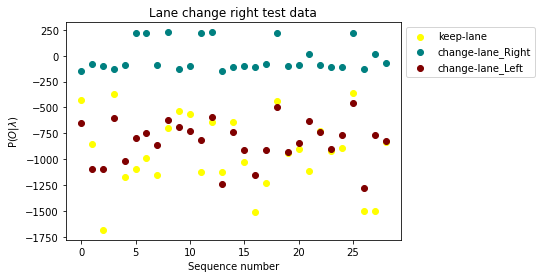

In [ ]:
##Probability
Test=l_c_r_Test
L_K=[]
L_C_R=[]
L_C_L=[]
for i in range(len(Test)-1):
    Turn_Left=Lane_Change_Model_Left.log_probability(Test[i])
    L_C_L.append(Turn_Left)
    Turn_Right=Lane_Change_Model_Right.log_probability(Test[i])
    L_C_R.append(Turn_Right)
    straight=Lane_Keep_Model.log_probability(Test[i])
    L_K.append(straight)



    #print('Likelihoods for Lane_Change_Left_Model =',Turn_Left)
    #print('Likelihoods for Lane_Change_Right_Model =',Turn_Right)
    #print('Likelihoods for Lane_Keep_Model =',straight)

#     if (Turn_Left>Turn_Right) and (Turn_Left> straight):
#         print("###Prediction = Lane_Change_Left")
#     elif (Turn_Right>Turn_Left) and (Turn_Right> straight):
#         print("###Prediction = Lane_Change_Right")
#     elif (straight>Turn_Left) and (straight> Turn_Left):
#         print("###3Prediction = Lane_Keep")

fig = plt.figure()
plt.xlabel('Sequence number')
plt.ylabel('P($ O|\lambda $)')
plt.title('Lane change right test data')
plt.scatter(x =list(range(len(Test)-1)),y=L_K,c='yellow',label="keep-lane")
plt.scatter(x =list(range(len(Test)-1)),y=L_C_R,c='teal',label="change-lane_Right")
plt.scatter(x =list(range(len(Test)-1)),y=L_C_L,c='maroon',label="change-lane_Left")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

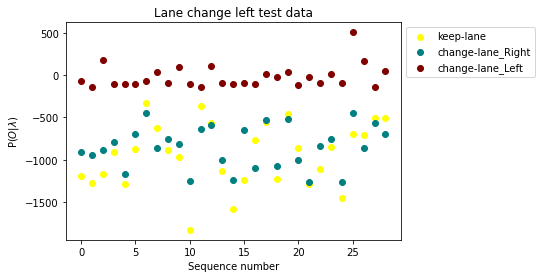

In [ ]:
##Probability
Test=l_c_l_Test
L_K=[]
L_C_R=[]
L_C_L=[]
for i in range(len(Test)-1):
    Turn_Left=Lane_Change_Model_Left.log_probability(Test[i])
    L_C_L.append(Turn_Left)
    Turn_Right=Lane_Change_Model_Right.log_probability(Test[i])
    L_C_R.append(Turn_Right)
    straight=Lane_Keep_Model.log_probability(Test[i])
    L_K.append(straight)



    #print('Likelihoods for Lane_Change_Left_Model =',Turn_Left)
    #print('Likelihoods for Lane_Change_Right_Model =',Turn_Right)
    #print('Likelihoods for Lane_Keep_Model =',straight)

#     if (Turn_Left>Turn_Right) and (Turn_Left> straight):
#         print("Prediction = Lane_Change_Left")
#     elif (Turn_Right>Turn_Left) and (Turn_Right> straight):
#         print("Prediction = Lane_Change_Right")
#     elif (straight>Turn_Left) and (straight> Turn_Left):
#         print("Prediction = Lane_Keep")

fig = plt.figure()
plt.xlabel('Sequence number')
plt.ylabel('P($ O|\lambda $)')
plt.title('Lane change left test data')
plt.scatter(x =list(range(len(Test)-1)),y=L_K,c='yellow',label="keep-lane")
plt.scatter(x =list(range(len(Test)-1)),y=L_C_R,c='teal',label="change-lane_Right")
plt.scatter(x =list(range(len(Test)-1)),y=L_C_L,c='maroon',label="change-lane_Left")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

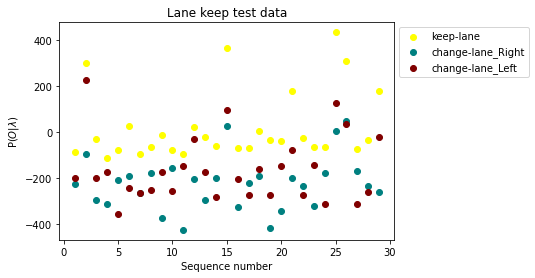

In [ ]:
##Probability
Test=l_k_Test
L_K=[]
L_C_R=[]
L_C_L=[]
for i in range(len(Test)-1):
    Turn_Left=Lane_Change_Model_Left.log_probability(Test[i])
    L_C_L.append(Turn_Left)
    Turn_Right=Lane_Change_Model_Right.log_probability(Test[i])
    L_C_R.append(Turn_Right)
    straight=Lane_Keep_Model.log_probability(Test[i])
    L_K.append(straight)



    #print('Likelihoods for Lane_Change_Left_Model =',Turn_Left)
    #print('Likelihoods for Lane_Change_Right_Model =',Turn_Right)
    #print('Likelihoods for Lane_Keep_Model =',straight)

    # if (Turn_Left>Turn_Right) and (Turn_Left> straight):
    #     print("Prediction = Lane_Change_Left")
    # elif (Turn_Right>Turn_Left) and (Turn_Right> straight):
    #     print("Prediction = Lane_Change_Right")
    # elif (straight>Turn_Left) and (straight> Turn_Left):
    #     print("Prediction = Lane_Keep")

fig = plt.figure()
plt.xlabel('Sequence number')
plt.ylabel('P($ O|\lambda $)')
plt.title('Lane keep test data')
plt.scatter(x =[i+1 for i in range(0,29)],y=L_K,c='yellow',label="keep-lane")
plt.scatter(x =[i+1 for i in range(0,29)],y=L_C_R,c='teal',label="change-lane_Right")
plt.scatter(x =[i+1 for i in range(0,29)],y=L_C_L,c='maroon',label="change-lane_Left")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Maneuver Feasibility Pygame

## Generating Data

In [13]:
# def TTC (V_Ego,X_Ego,V_s,X_s):
#     ttc=(X_s-X_Ego)/(V_Ego-V_s)
#     if ttc>0:
#         ttc=ttc
#     else:
#         ttc=100
#     return ttc

# def MSM (X_s,X_Ego):
#     msm=X_Ego-X_s
#     return msm

def two_num(num):
    count =0
    a_b=[];                              a_f=[];
    while count < num:
        Back = np.random.uniform(low=64.01   , high=128 , size=1)
        Front= np.random.uniform(low=0   , high=64  , size=1)

        if (Back-Front)>7:
            #print((Back-Front))
            #print(Back[0]-Front[0])
            a_b.append(Back )
            a_f.append(Front)
            count+=1
    return a_b ,a_f

def Data_Generator(N):
    # set a seed so that the results are consistent
    import random
    random.seed(223)
    #print(p)
    #print(sum(p))
    np.random.seed(123345)
    ##############################  Create Positions  ##########################################
    l=two_num (N)
    l_a_b  = np.array(l[0])
    l_a_f  = np.array(l[1])

    f      = np.random.uniform(low=0   , high=58 , size=N)#V

    r=two_num (N)
    r_a_b  = np.array(r[0])
    r_a_f  = np.array(r[1])

    Ego    = np.random.uniform(low=64  , high=64 , size=N)

    ##############################   Round Nombers  ###############################################
    l_a_f  = np.round(l_a_f,  decimals=1)
    l_a_b  = np.round(l_a_b,  decimals=1)
    f      = np.round(f,      decimals=1)
    r_a_b  = np.round(r_a_b,  decimals=1)
    r_a_f  = np.round(r_a_f,  decimals=1)

    Ego    = np.round(Ego,    decimals=1)

    return(l_a_f,l_a_b,f,r_a_b,r_a_f,Ego)


In [14]:
data=Data_Generator(140000)
print(len(data[0]))

140000


In [15]:
# (l_a_f,l_a_b,f,r_a_b,r_a_f,Ego)
def noise(mu,sigma):
    mu, sigma = mu,sigma
    noise =np.abs(np.random.normal(mu, sigma, 1)).round(decimals=3)
    noise =noise.tolist()
    return noise
# noise(mu=11.2,sigma=.01)[0]
senarios=[]
center=noise(mu=7.2,sigma=.5)[0]
left=noise(mu=3.2,sigma=.5)[0]
right=noise(mu=11.2,sigma=.5)[0]
for i in range(len(data[0])):
    a=[[left,data[1][i]],[left,data[0][i]],[center,data[5][i]],
       [center,data[2][i]],[right,data[3][i]],[right,data[4][i]]]
    senarios.append(a)

In [16]:
senarios[0]

[[3.592, array([83.])],
 [3.592, array([12.7])],
 [7.064, 64.0],
 [7.064, 5.7],
 [10.869, array([85.4])],
 [10.869, array([12.3])]]

In [17]:
s=[]
s=[[3, np.array([71])],
 [3, np.array([56])],
 [7.064, 64.0],
 [7.064, 50],
 [10.869, np.array([53])],
 [10.869, np.array([76])]]

## Visualization

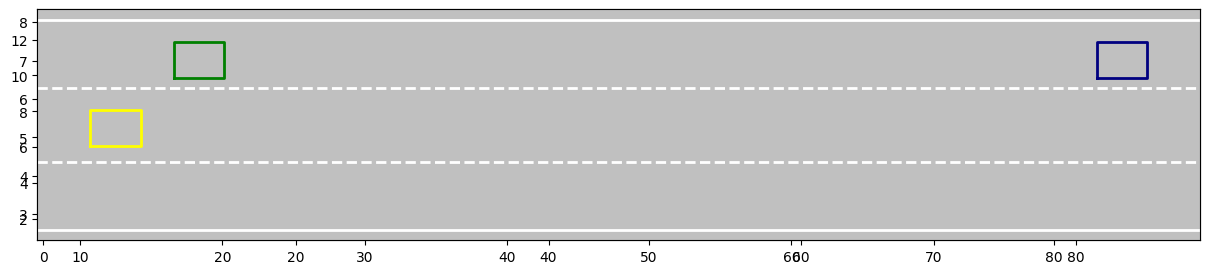

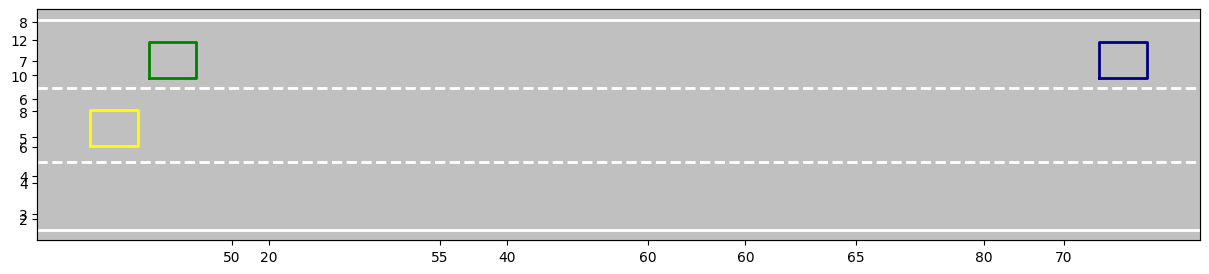

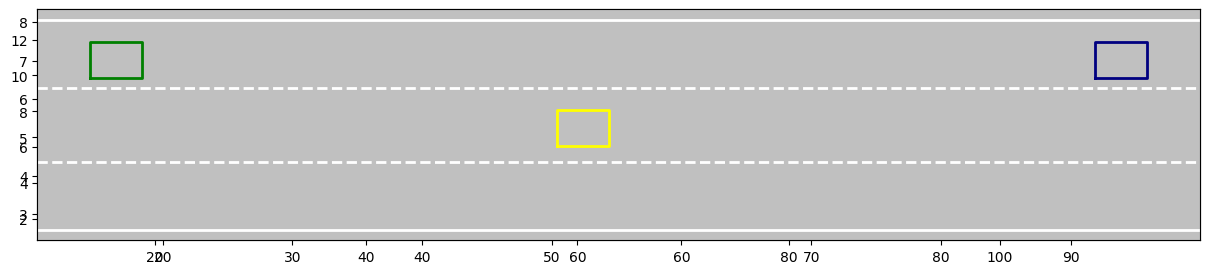

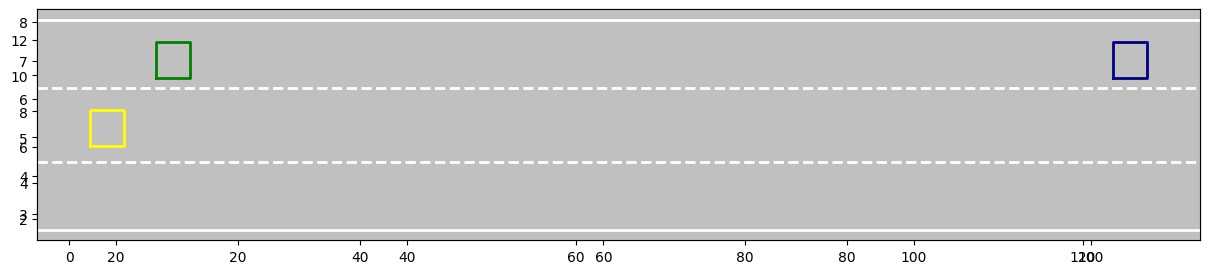

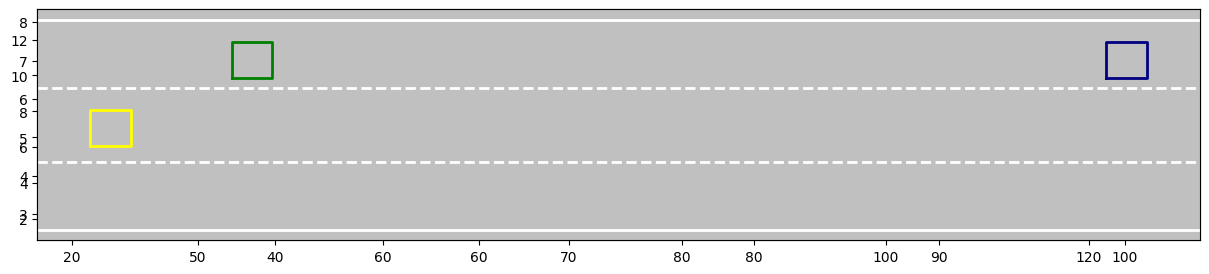

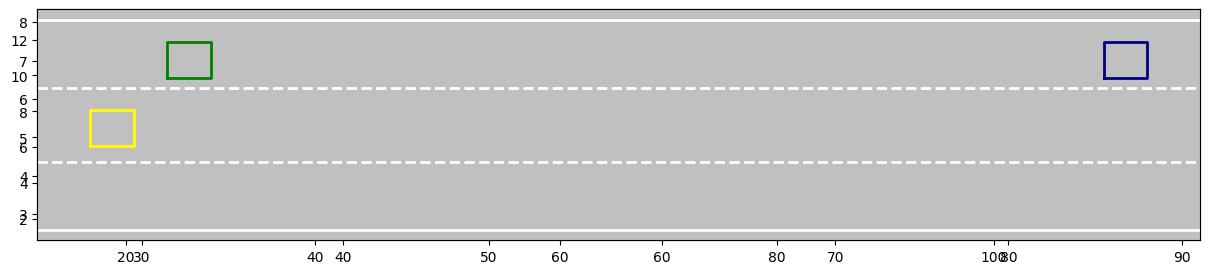

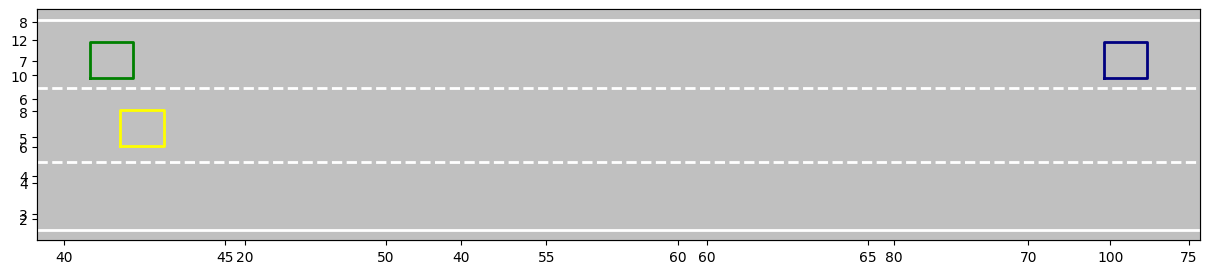

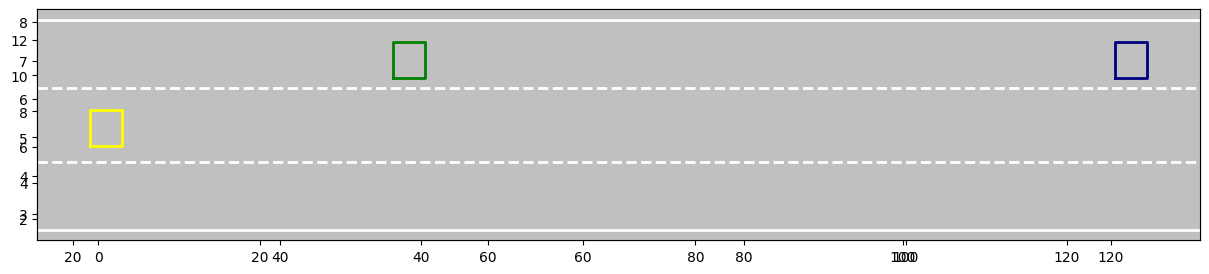

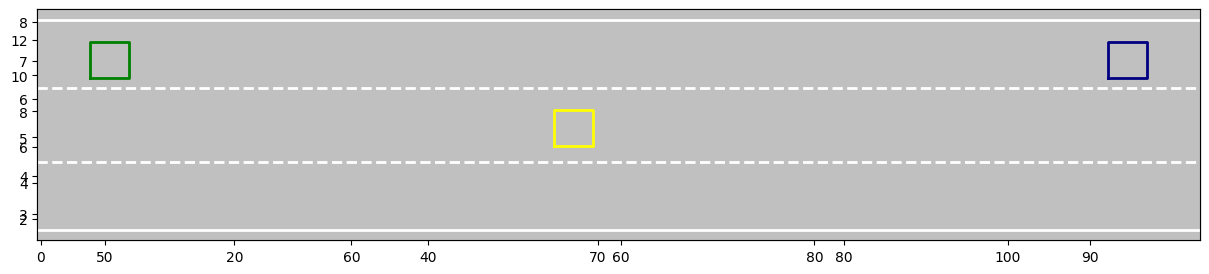

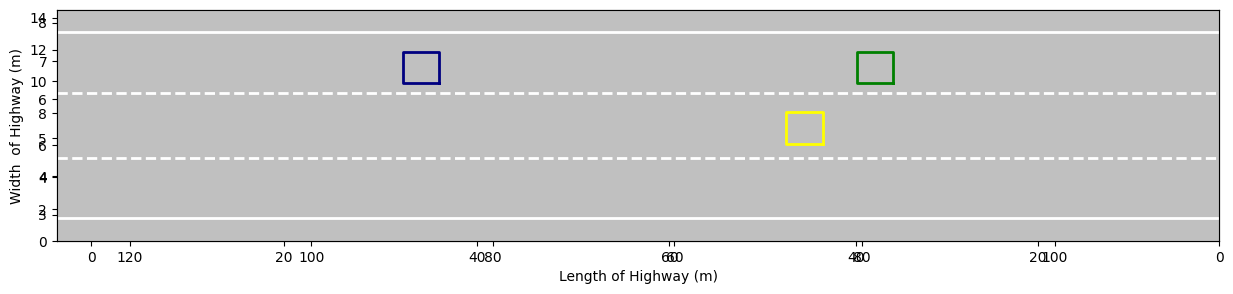

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import math
u=1.     #x-position of the center
v=0.5    #y-position of the center
a=20     #radius on the x-axis
b=6    #radius on the y-axis
for i in senarios[:10]:
    count=0
    plt.figure(figsize=(15,3))
    for j in i:
        x=j[1]
        y=j[0]
        if count==2:
          plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                      color = 'red',linewidth=2)
          plt.plot([x-2+6,x-2+6,x+2+6,x+2+6,x-2+6],[y-1, y+1, y+1,y-1,y-1],
                      color = 'white',linewidth=5)
          plt.plot([x-2+6,x-2+6,x+2+6,x+2+6,x-2+6],[y-1, y+1, y+1,y-1,y-1],
                      color = 'blue',linewidth=3)
          plt.plot([x-2+6,x-2+6,x+2+6,x+2+6,x-2+6],[y-1, y+1, y+1,y-1,y-1],
                      color = 'red',linewidth=1)


          ax = plt.axes()
          ax.set_facecolor('silver')
          plt.axhline(y=1.4,linewidth=2,  color='white', linestyle='-' )
          plt.axhline(y=5.2,linewidth=2,  color='white', linestyle='--')
          plt.axhline(y=9.3,linewidth=2,  color='white', linestyle='--')
          plt.axhline(y=13.1,linewidth=2, color='white', linestyle='-' )
        elif count==0:## back-left car
            plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                     color = 'fuchsia',linewidth=2)
        elif count==1:
            plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                     color = 'mediumslateblue',linewidth=2)

        elif count==3:## front car
            plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                     color = 'yellow',linewidth=2)
        elif count==4:## Top-right car
          plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                  color = 'navy',linewidth=2)
        elif count==5:## back-right car
          plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                     color = 'green',linewidth=2)

        count+=1
plt.xlabel('Length of Highway (m)')
plt.ylabel('Width  of Highway (m)')
plt.xlim((128,0))
plt.ylim((0,14.5))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


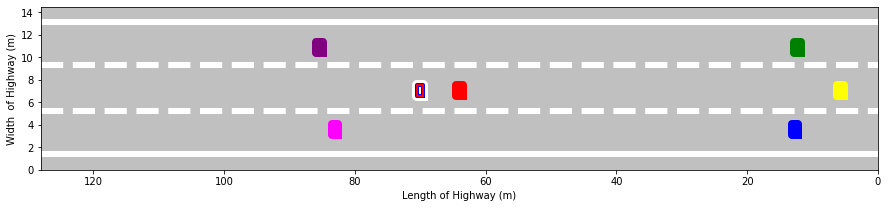

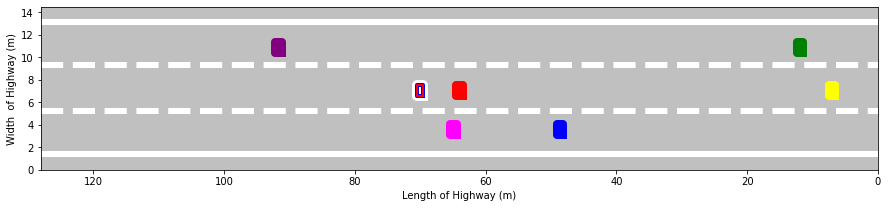

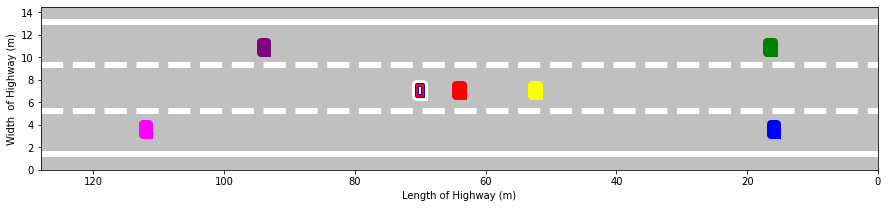

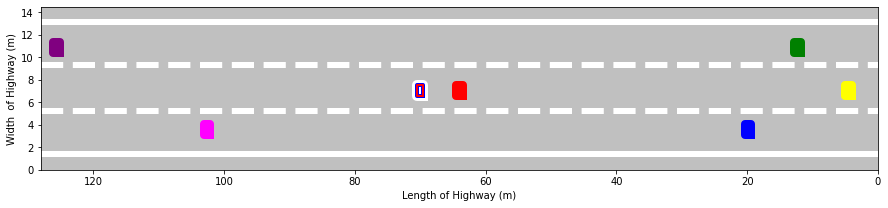

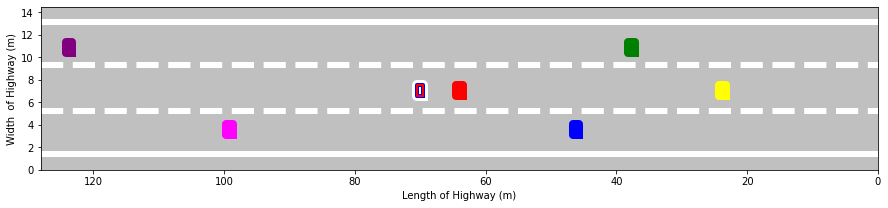

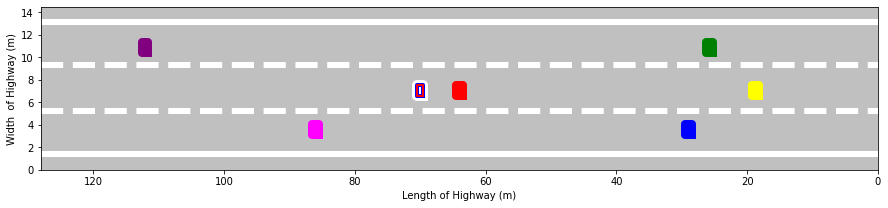

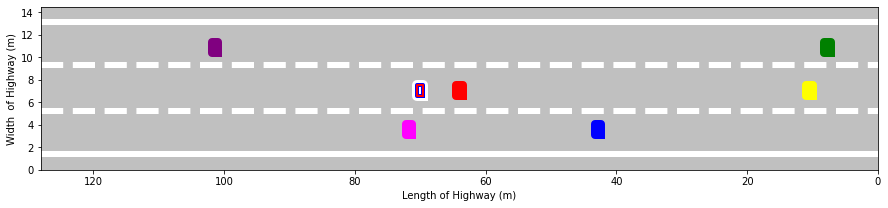

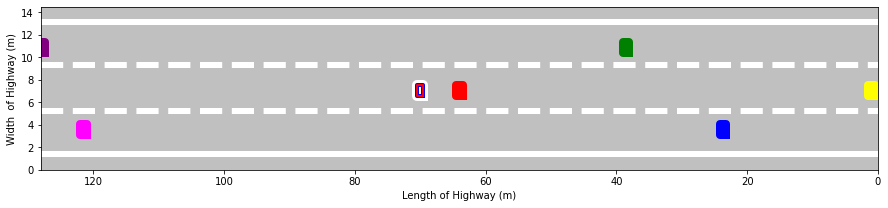

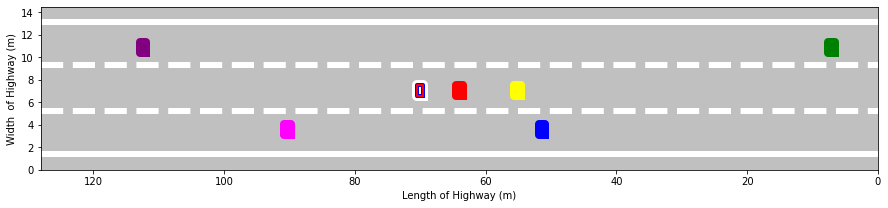

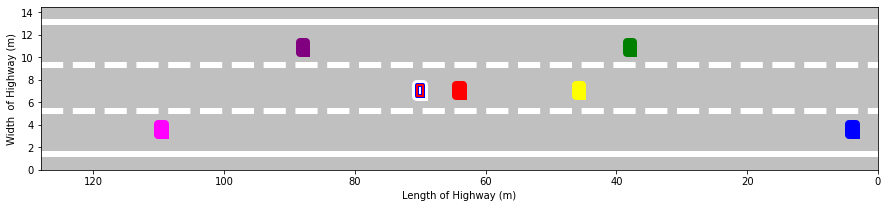

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import math
u=1.     #x-position of the center
v=0.5    #y-position of the center
a=20     #radius on the x-axis
b=6    #radius on the y-axis

#plt.show()
for i in senarios[:10]:
    count=0
    plt.figure(figsize=(15,3))
    for j in i:
        x=j[1]
        y=j[0]
        if count==2:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'red',linewidth=8)
            plt.plot([x-2/4+6,x-2/4+6,x+2/4+6,x+2/4+6,x-2/4+6],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'white',linewidth=10)
            plt.plot([x-2/4+6,x-2/4+6,x+2/4+6,x+2/4+6,x-2/4+6],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'blue',linewidth=4)
            plt.plot([x-2/4+6,x-2/4+6,x+2/4+6,x+2/4+6,x-2/4+6],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'red',linewidth=2)


            ax = plt.axes()
            ax.set_facecolor('silver')
            plt.axhline(y=1.4,linewidth=6,  color='white', linestyle='-' )
            plt.axhline(y=5.2,linewidth=6,  color='white', linestyle='--')
            plt.axhline(y=9.3,linewidth=6,  color='white', linestyle='--')
            plt.axhline(y=13.1,linewidth=6, color='white', linestyle='-' )
            #t = np.linspace(0, 2*math.pi, 100)
            #plt.plot( x-6+a*np.cos(t) , y+b*np.sin(t) ,linewidth=2)
            #plt.text(y, x, str('Ego'), fontsize=2)
        elif count==0:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'fuchsia',linewidth=8)
        elif count==1:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'blue',linewidth=8)

        elif count==3:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'yellow',linewidth=8)
        elif count==4:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'purple',linewidth=8)
        elif count==5:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'green',linewidth=8)

        count+=1



        #plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
        #plt.plot(j[1],j[0])
    plt.xlabel('Length of Highway (m)')
    plt.ylabel('Width  of Highway (m)')
    plt.xlim((128,0))
    plt.ylim((0,14.5))
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


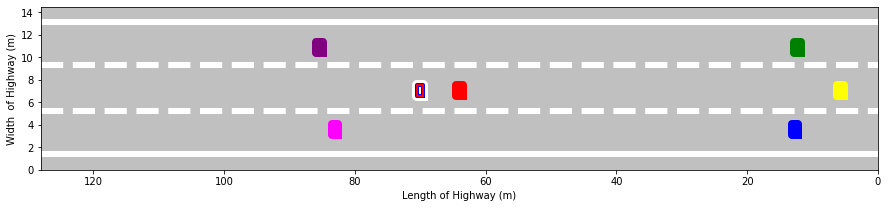

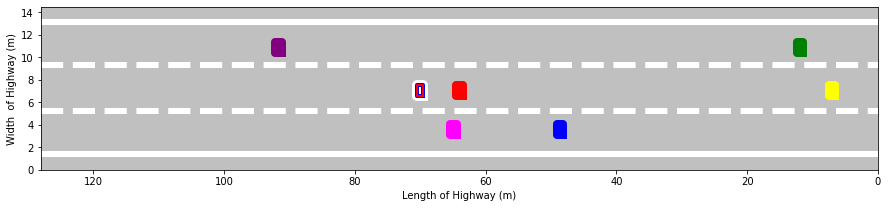

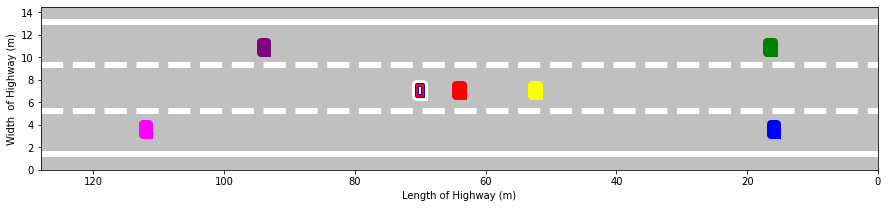

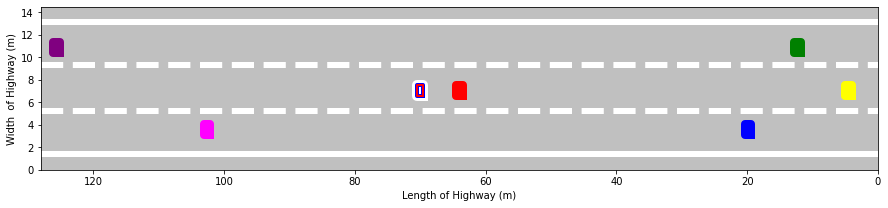

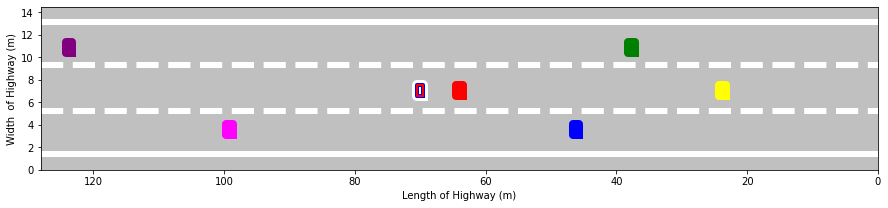

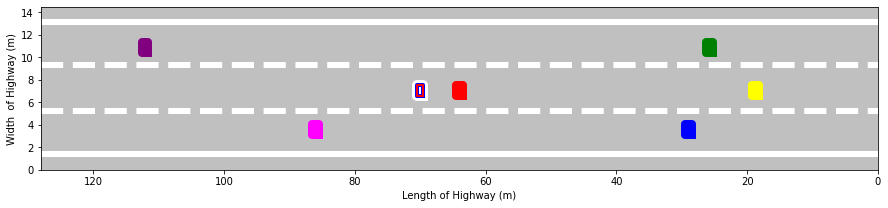

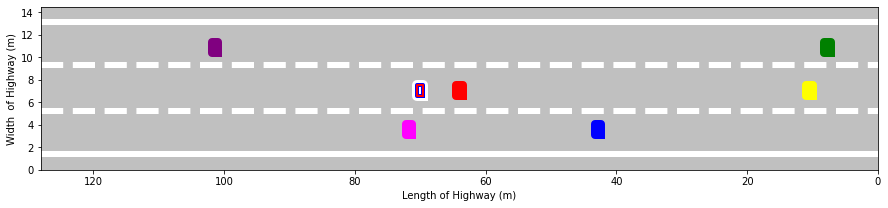

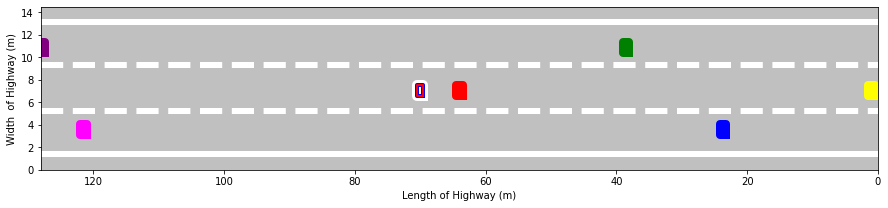

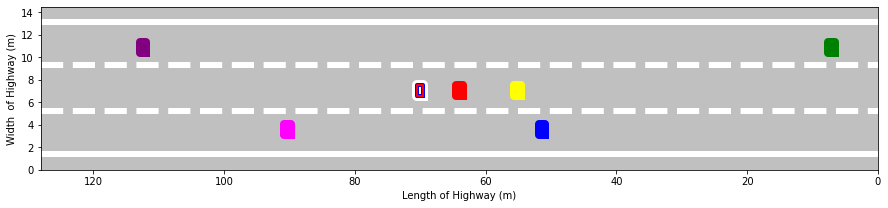

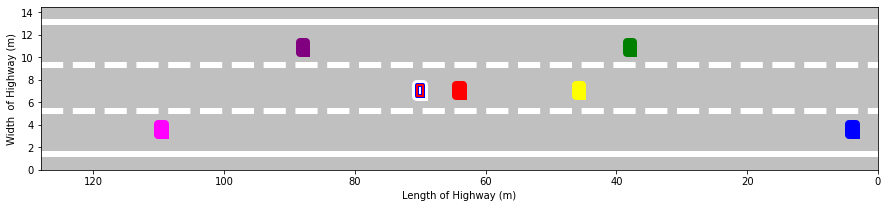

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import math
u=1.     #x-position of the center
v=0.5    #y-position of the center
a=20     #radius on the x-axis
b=6    #radius on the y-axis

#plt.show()
for i in senarios[:10]:
    count=0
    plt.figure(figsize=(15,3))
    for j in i:
        x=j[1]
        y=j[0]
        if count==2:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'red',linewidth=8)
            plt.plot([x-2/4+6,x-2/4+6,x+2/4+6,x+2/4+6,x-2/4+6],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'white',linewidth=10)
            plt.plot([x-2/4+6,x-2/4+6,x+2/4+6,x+2/4+6,x-2/4+6],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'blue',linewidth=4)
            plt.plot([x-2/4+6,x-2/4+6,x+2/4+6,x+2/4+6,x-2/4+6],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'red',linewidth=2)


            ax = plt.axes()
            ax.set_facecolor('silver')
            plt.axhline(y=1.4,linewidth=6,  color='white', linestyle='-' )
            plt.axhline(y=5.2,linewidth=6,  color='white', linestyle='--')
            plt.axhline(y=9.3,linewidth=6,  color='white', linestyle='--')
            plt.axhline(y=13.1,linewidth=6, color='white', linestyle='-' )
            #t = np.linspace(0, 2*math.pi, 100)
            #plt.plot( x-6+a*np.cos(t) , y+b*np.sin(t) ,linewidth=2)
            #plt.text(y, x, str('Ego'), fontsize=2)
        elif count==0:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'fuchsia',linewidth=8)
        elif count==1:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'blue',linewidth=8)

        elif count==3:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'yellow',linewidth=8)
        elif count==4:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'purple',linewidth=8)
        elif count==5:
            plt.plot([x-2/4,x-2/4,x+2/4,x+2/4,x-2/4],[y-1/2, y+1/2, y+1/2,y-1/2,y-1/2],
                     color = 'green',linewidth=8)

        count+=1



        #plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
        #plt.plot(j[1],j[0])
    plt.xlabel('Length of Highway (m)')
    plt.ylabel('Width  of Highway (m)')
    plt.xlim((128,0))
    plt.ylim((0,14.5))
    plt.show()

## Labeling

In [21]:
data  = [];                                 Label = [];                      Data_with_Label = [];
for i in senarios:
    Data  = [];                             label = [];

    E_l_b = i[0][1] - i[2][1]
    E_l_f = i[2][1] - i[1][1]
    E_f   = i[2][1] - i[3][1]
    E_r_b = i[4][1] - i[2][1]
    E_r_f = i[2][1] - i[5][1]

    E_f   = E_f.tolist()

    E_l_b = E_l_b [0]
    E_l_f = E_l_f [0]
    E_r_b = E_r_b [0]
    E_r_f = E_r_f [0]

######################################## Change Type ##########################################
#     print(E_l_b.shape,E_l_f.shape,E_r_b.shape,E_r_f.shape,E_f.shape)
#     print(type(E_l_b),type(E_l_f),type(E_r_b),type(E_r_f),type(E_f))
######################################## Maneuver Change Left #################################
    if E_l_b<0 or E_l_f<0 or E_r_b<0 or E_r_f<0 or E_f<0:
        print("ERROR")
    if (14<=(E_l_b+E_l_f)) and (6<=E_l_f) and (6<=E_l_b):
        Data.append(E_l_b)
        Data.append(E_l_f)
        label.append("Feasible")
    else:
        Data.append(E_l_b)
        Data.append(E_l_f)
        label.append("Impossible")
####################################### Maneuver Change Right ################################
    if (14<=(E_r_b+E_r_f)) and (6<=E_r_f) and (6<=E_r_b):
        Data.append(E_r_b)
        Data.append(E_r_f)
        label.append("Feasible")
    else:
        Data.append(E_r_b)
        Data.append(E_r_f)
        label.append("Impossible")

    data.append(Data)
    Label.append(label)
    Data_with_Label.append([Data ,label])

    Data=[]
    label=[]
print(len(Data_with_Label))

140000


In [22]:
count1=0
count2=0
count3=0
count4=0
pos_pos=[]
pos_i=[]
i_pos=[]
i_i=[]
for i in Data_with_Label:
#     print(i)
#     print(len(i[1]))
#     print(i[1][2])
    if (i[1][0]=="Impossible") and (i[1][1]=="Impossible"):
        i_i.append(i)
        count1=count1+1
    if (i[1][0]=="Impossible") and (i[1][1]=="Feasible"):
        i_pos.append(i)
        count2=count2+1
    if (i[1][0]=="Feasible") and (i[1][1]=="Feasible"):
        pos_pos.append(i)
        count3=count3+1
    if (i[1][0]=="Feasible") and (i[1][1]=="Impossible"):
        pos_i.append(i)
        count4=count4+1
print(count1,count2,count3,count4)
print(len(pos_pos),len(pos_i),len(i_pos),len(i_i))

4135 19924 95950 19991
95950 19991 19924 4135


In [23]:
from random import shuffle
shuffle(i_i)
shuffle(i_pos)
shuffle(pos_i)
shuffle(pos_pos)

In [24]:
i_i    = i_i[:500]
i_pos  = i_pos[:500]
pos_i  = pos_i[:500]
pos_pos= pos_pos[:500]
i_i [0]

[[1.2000000000000028, 29.200000000000003, 0.7000000000000028, 35.6],
 ['Impossible', 'Impossible']]

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from io import StringIO
from IPython.display import Image
import pydotplus

In [26]:
All_Data=i_i+i_pos+pos_i+pos_pos
shuffle(All_Data)

In [27]:
len(All_Data)

2000

In [28]:
df_f = pd.DataFrame ()
df_l = pd.DataFrame ()
for i in range(len(All_Data)):
    df1 = pd.DataFrame ([All_Data[i][0]],columns=['Ego-left back','Ego-left forward','Ego_right back',
                                                  'Ego_right front'])
    df2 = pd.DataFrame ([All_Data[i][1]],columns=['Left','Right'])

    df_f = df_f.append(df1, ignore_index=True)
    df_l = df_l.append(df2, ignore_index=True)
df_l.head()
df_f.head()

Streaming output truncated to the last 5000 lines.
<ipython-input-28-d781cce2a99a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_f = df_f.append(df1, ignore_index=True)
<ipython-input-28-d781cce2a99a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_l = df_l.append(df2, ignore_index=True)
<ipython-input-28-d781cce2a99a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_f = df_f.append(df1, ignore_index=True)
<ipython-input-28-d781cce2a99a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_l = df_l.append(df2, ignore_index=True)
<ipython-input-28-d781cce2a99a>:8: FutureWarning: The frame.append method is deprecated and will 

,Ego-left back,Ego-left forward,Ego_right back,Ego_right front
0,51.6,1.2,3.3,38.4
1,43.4,5.1,14.1,38.5
2,31.3,25.9,41.1,16.5
3,14.6,34.9,19.7,0.6
4,36.0,44.1,61.4,53.6


In [29]:
df_l.head()

,Left,Right
0,Impossible,Impossible
1,Impossible,Feasible
2,Feasible,Feasible
3,Feasible,Impossible
4,Feasible,Feasible


In [30]:
y=df_l.to_numpy()
X=df_f.to_numpy()
Y=[]
for i in y:
    label=[]
    if (i[0]=='Impossible') and (i[1]=='Impossible'):
        label.append("Left is Not Possible _____ Right is Not Possible")
    if (i[0]=='Impossible') and (i[1]=='Feasible'):
        label.append("Left is Not Possible _____ Right is Feasible")
    if (i[0]=='Feasible') and (i[1]=='Impossible'):
        label.append("Left is Feasible _____ Right is Not Possible")
    if (i[0]=='Feasible') and (i[1]=='Feasible'):
        label.append("Left is Feasible _____ Right is Feasible")
    Y.append(label)

## Decision Tree Training

In [31]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint

# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation
    #scores = cross_val_score(estimator=clf, X=standardized_X, y=Y, cv=7, n_jobs=4)
    scores = cross_val_score(estimator=clf, X=X, y=Y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.8075170443591497), (4, 0.9945002366054997), (5, 0.9935012356064987), (6, 0.9929999824736667), (7, 0.9929999824736667), (8, 0.9929999824736667), (9, 0.9949979844716689), (10, 0.9929999824736667), (11, 0.992998229840335), (12, 0.9949997371050003), (13, 0.9939989834726676), (14, 0.9934994829731671), (15, 0.9944984839721683), (16, 0.9934994829731671), (17, 0.9934977303398357), (18, 0.9934994829731671), (19, 0.9944984839721682)]


<function matplotlib.pyplot.show(close=None, block=None)>

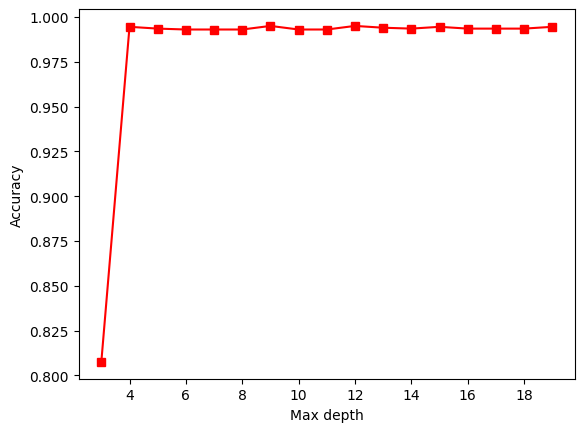

In [32]:
deptht=[i[0] for i in  depth]
validation_scoret=[i[1] for i in depth]
plt.plot(deptht,validation_scoret,marker='s',color='r')
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.show

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1,shuffle=False)
X_train

array([[51.6,  1.2,  3.3, 38.4],
       [43.4,  5.1, 14.1, 38.5],
       [31.3, 25.9, 41.1, 16.5],
       ...,
       [22.6,  3.7, 36.6, 25.9],
       [ 0.2, 38.8, 23.9, 45.3],
       [44.6, 53.3, 48. ,  9.7]])

In [34]:
model2 = DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=4).fit(X_train,y_train)
y_pred = model2.predict(X_test)
#print(y_pred[:50])
y_pred1 = model2.predict(X_train)

In [35]:
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred1))
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))

Accuracy Train: 0.9973333333333333
Accuracy Test: 0.994


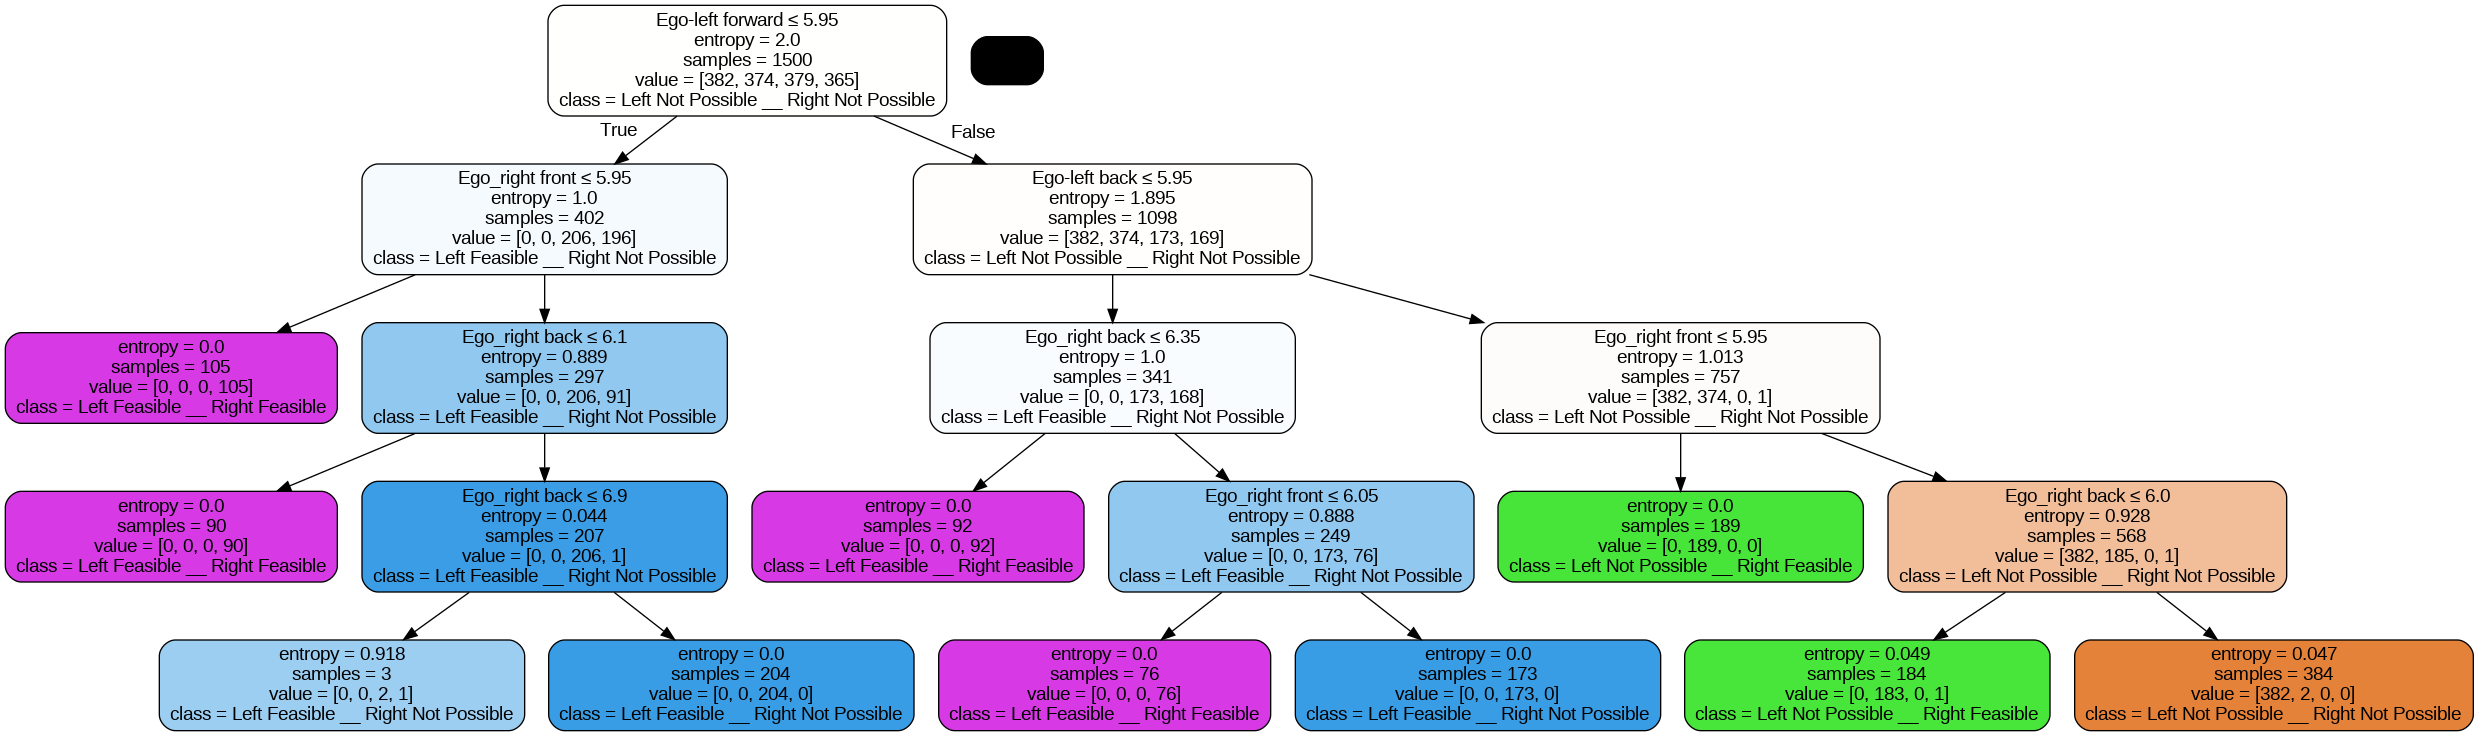

In [36]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO # For old versions
from io import StringIO
from IPython.display import Image            # to display on screen
import pydotplus                             # Convert Graph to Pic

dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names=['Ego-left back','Ego-left forward','Ego_right back',
                                                  'Ego_right front'],
                class_names=['Left Not Possible __ Right Not Possible',
                             'Left Not Possible __ Right Feasible',
                             'Left Feasible __ Right Not Possible',
                             'Left Feasible __ Right Feasible'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
graph.write_svg('tree.svg')
Image(graph.create_png())

Classification Report:

                                                   precision    recall  f1-score   support

        Left is Feasible _____ Right is Feasible       1.00      1.00      1.00       118
    Left is Feasible _____ Right is Not Possible       0.99      1.00      1.00       126
    Left is Not Possible _____ Right is Feasible       1.00      0.98      0.99       121
Left is Not Possible _____ Right is Not Possible       0.99      0.99      0.99       135

                                        accuracy                           0.99       500
                                       macro avg       0.99      0.99      0.99       500
                                    weighted avg       0.99      0.99      0.99       500

Confusion Matrix:

 [[118   0   0   0]
 [  0 126   0   0]
 [  0   0 119   2]
 [  0   1   0 134]]


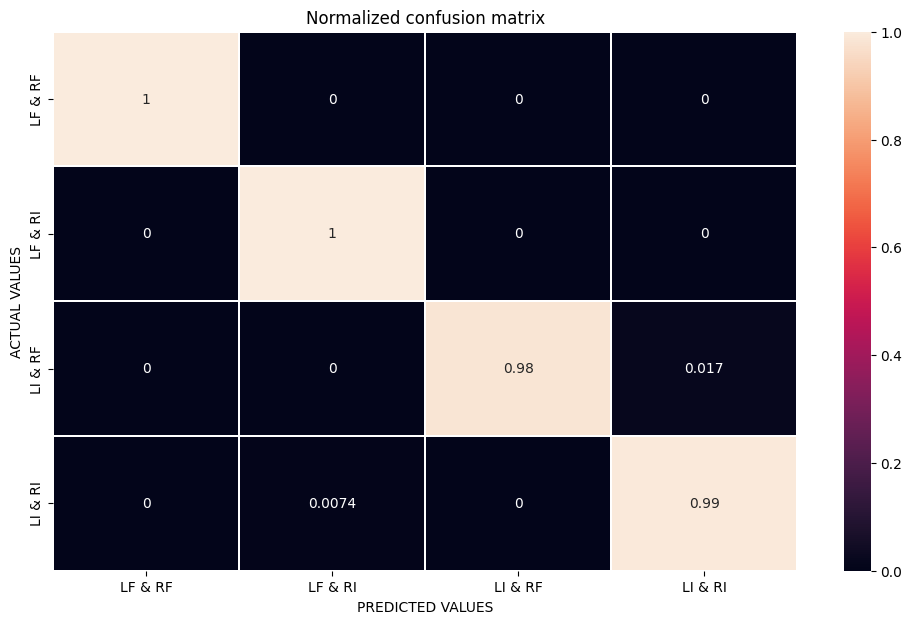

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=model2 .predict(X_test)
#print(predictions)
print('Classification Report:\n\n',classification_report(y_test,predictions))
print("Confusion Matrix:\n\n",confusion_matrix(y_test,predictions))
p=confusion_matrix(y_test,predictions)
# cm_display = metrics.ConfusionMatrixDisplay(p, display_labels = ["Left feasible & Right feasible", "Left Feasible & Right infeasible","Left infeasible & Right Feasible",'Left infeasible & Right infeasible'])
# cm_display.plot()
# plt.show()

import seaborn as sns
cm_normalized = p.astype('float') / p.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(12,7))
categories = ["LF & RF", "LF & RI","LI & RF",'LI & RI']

sns.heatmap(cm_normalized, annot=True, linewidths = 0.01, ax = ax,xticklabels=categories, yticklabels=categories)
ax.set_title('Normalized confusion matrix')
ax.set_xlabel('PREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",annot_kws={'fontsize': 10},cmap = "Blues")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=20, ha='right', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    return fig

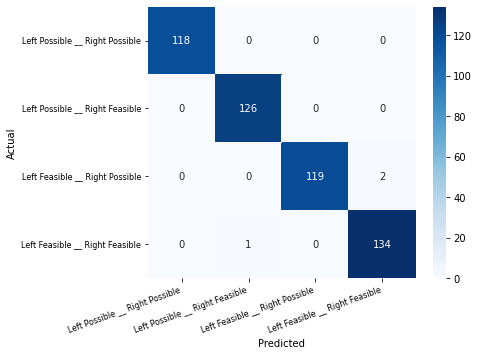

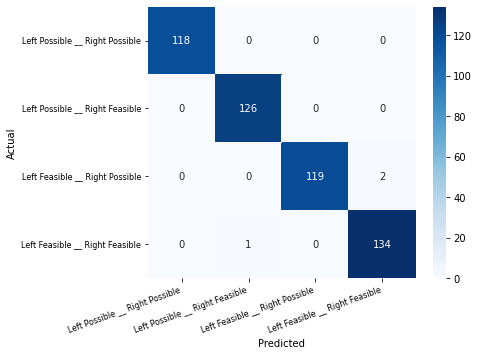

In [ ]:
print_confusion_matrix(p, ['Left Possible __ Right Possible',
                             'Left Possible __ Right Feasible',
                             'Left Feasible __ Right Possible',
                             'Left Feasible __ Right Feasible'], figsize = (6,5), fontsize=8)

## Decision Tree Saving

In [ ]:
import pickle
pickle.dump(model2, open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Decision_Trees_simulation.bin, 'wb'))

# Evaluation

## Import Models

In [ ]:
# load the model from disk
import pickle
DT_Simulation_model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /DT_Pygame.bin', 'rb'))
Lane_Keep_Model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /LK_HMM.bin', 'rb'))
Lane_Change_Model_Left = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /LCL_HMM.bin', 'rb'))
Lane_Change_Model_Right = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /LCR_HMM.bin', 'rb'))

## All Modes

### Right infeasible & Left infeasible   ,         Lane keep ----> No punishment



In [ ]:
Dt = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/LNf _ RNf->LK,NP/Feasibility.csv','r')
online_L_C_R = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/LNf _ RNf->LK,NP/Maneuvers.csv','r')

### Right feasible & Left infeasible ,  Lane keep ----> punishment



In [ ]:
Dt = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/LNf _ Rf->LK,P/Feasibility.csv','r')
online_L_C_R = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/LNf _ Rf->LK,P/Maneuvers.csv','r')

### Right feasible & Left infeasible ,  Lane Change Right ----> No punishment

In [ ]:
Dt = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/LNf _ Rf->LCR,NP/Feasibility.csv','r')
online_L_C_R = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/LNf _ Rf->LCR,NP/Maneuvers.csv','r')

### Right infeasible & Left feasible , Lane keep ----> punishment

In [ ]:
Dt = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/Lf _ RNf->LK,P/Feasibility.csv','r')
online_L_C_R = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/Lf _ RNf->LK,P/Maneuvers.csv','r')

### Right infeasible & Left feasible , Lane Change Left ----> NO punishment

In [ ]:
Dt = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/Lf _ RNf->LCL,NP/Feasibility.csv','r')
online_L_C_R = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/Lf _ RNf->LCL,NP/Maneuvers.csv','r')

### Right feasible & Left feasible , Lane Change Left ----> NO punishment

In [ ]:
Dt = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/Lf _ Rf->LCL,NP/Feasibility.csv','r')
online_L_C_R = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/Lf _ Rf->LCL,NP/Maneuvers.csv','r')

### Right feasible & Left feasible , Lane Change Right ----> NO punishment

In [ ]:
Dt = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/Lf _ Rf->LCR,NP/Feasibility.csv','r')
online_L_C_R = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/Lf _ Rf->LCR,NP/Maneuvers.csv','r')

### Right feasible & Left feasible , Lane keep ---->  punishment

In [ ]:
Dt = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/Lf _ Rf->LK,P/Feasibility.csv','r')
online_L_C_R = open('/content/drive/MyDrive/Colab Notebooks/MS.C_Pygame /Tests/Lf _ Rf->LK,P/Maneuvers.csv','r')

## Proposed System

In [ ]:
tree= [s.split(',') for s in Dt.readlines()]
dtree=np.array([[float(k) for k in data] for data in tree])
DT_Simulation_model.predict(dtree)

array(['Left is Feasible _____ Right is Feasible'], dtype='<U48')

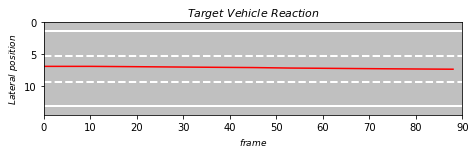

Left is Feasible _____ Right is Feasible
Second:  4.5 ----> Lane Keep
Second:  5.0 ----> Lane Keep
Second:  5.5 ----> Lane Keep
Second:  6.0 ----> Lane Keep
Second:  6.5 ----> Lane Keep
Second:  7.0 ----> Lane Keep
Second:  7.5 ----> Lane Keep
Second:  8.0 ----> Lane Keep
Second:  8.5 ----> Lane Keep
Lane Keep
 
Reaction is  Lane Keep     &       Left is Feasible _____ Right is Feasible
Evaluation --------> two panishment


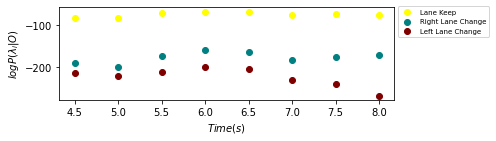

In [ ]:

def evaluation(behaviour , Feasible_maneuver):
    if Feasible_maneuver=='Left is Feasible _____ Right is Not Possible':
        if behaviour=='Lane Change Left':
            Evaluation=("Evaluation --------> No panishment")
        elif behaviour==("Lane Keep"):
            Evaluation=("Evaluation --------> one panishment")
    if Feasible_maneuver=='Left is Feasible _____ Right is Feasible':
        if behaviour==('Lane Change Left'):
            Evaluation=("Evaluation --------> No panishment")
        if behaviour==('Lane Change Right'):
            Evaluation=("Evaluation --------> No panishment")
        elif behaviour==("Lane Keep"):
            Evaluation=("Evaluation --------> two panishment")
    if Feasible_maneuver=='Left is Not Possible _____ Right is Feasible':
        if behaviour==('Lane Change Right'):
            Evaluation=("Evaluation --------> No panishment")
        elif behaviour==("Lane Keep"):
            Evaluation=("Evaluation --------> one panishment")
    if (Feasible_maneuver=='Left is Not Possible _____ Right is Not Possible'):
       # if behaviour==('Lane keep'):
            Evaluation=("Evaluation --------> No panishment")
    return behaviour , Feasible_maneuver ,Evaluation

P= [s.split(',') for s in online_L_C_R.readlines()]
Data_O=np.array([[float(k) for k in data] for data in P])
# print(type(df))
# print(Data_O.shape)
Window=list(more_itertools.windowed(Data_O,n=45, step=5))
# print(len(Window))



fig = plt.figure(figsize=(7.5,1.7))
plt.rcParams['axes.facecolor'] = 'silver'
plt.axhline(y=1.4,linewidth=2,  color='white', linestyle='-' )
plt.axhline(y=5.2,linewidth=2,  color='white', linestyle='--')
plt.axhline(y=9.3,linewidth=2,  color='white', linestyle='--')
plt.axhline(y=13.1,linewidth=2, color='white', linestyle='-' )
plt.axis([0, 90,14.5, 0])
plt.xlabel('$frame$',fontsize=9)
plt.ylabel('$Lateral\\ position$',fontsize=9)
plt.title('$Target\\ Vehicle\\ Reaction$',fontsize=11)
#print(len(Data_O[0]))
plt.plot(range(len(Data_O)), Data_O[:,0],c='r')
plt.show()
L_K=[]
L_C_R=[]
L_C_L=[]
del Window[-1]
count=4.5
FEASIBILITY=DT_Simulation_model.predict(dtree)
print(FEASIBILITY[0])
behaviour=[]
for i in Window:
    Turn_Left=Lane_Change_Model_Left.log_probability(i)
    L_C_L.append(Turn_Left)
    Turn_Right=Lane_Change_Model_Right.log_probability(i)
    L_C_R.append(Turn_Right)
    straight=Lane_Keep_Model.log_probability(i)
    L_K.append(straight)

    if (Turn_Left>Turn_Right) and (Turn_Left> straight):
        print("Second: " ,count,"----> Lane Change Left")
        behaviour.append('Lane Change Left')
    elif (Turn_Right>Turn_Left) and (Turn_Right> straight):
        print("Second: " ,count,"----> Lane Change Right")
        behaviour.append('Lane Change Right')
    elif (straight>Turn_Left) and (straight> Turn_Left):
        print("Second: " ,count,"----> Lane Keep")
        behaviour.append('Lane Keep')

    count=count+.5
# print(behaviour)
print(behaviour[-1])
print(" ")
EVALUATION=evaluation(behaviour[-1] , FEASIBILITY[0])
print("Reaction is ",EVALUATION[0],"    & ","    ",EVALUATION[1])
# print(" ")
# print(EVALUATION[1])
# print(" ")
print(EVALUATION[2])
del L_K[-1]
del L_C_R[-1]
del L_C_L[-2]
fig = plt.figure(figsize=(6,1.7))
plt.rcParams['axes.facecolor'] = 'white'
plt.xlabel('$Time(s)$',fontsize=10)
plt.ylabel('$ log  P( \lambda_i|O $)',fontsize=10)
# plt.title('Lane Change Left Data',fontsize=11)
# print(L_K)
# plt.scatter(x =list(range(len(L_K))),y=L_K,c='yellow',label="keep-lane")
plt.scatter(x =[4.5,5,5.5,6,6.5,7,7.5,8],y=L_K,c='yellow',label="Lane Keep")
plt.scatter(x =[4.5,5,5.5,6,6.5,7,7.5,8],y=L_C_R,c='teal',label="Right Lane Change")
plt.scatter(x =[4.5,5,5.5,6,6.5,7,7.5,8],y=L_C_L,c='maroon',label="Left Lane Change")
plt.legend(bbox_to_anchor=(1, 1.05),fontsize = 'x-small')
plt.show()

0 or 1 or 2 or 30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


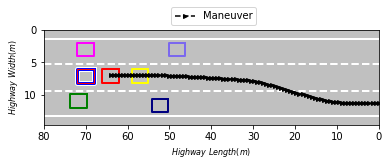

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import math
u=1.     #x-position of the center
v=0.5    #y-position of the center
a=20     #radius on the x-axis
b=6    #radius on the y-axis


###############################################################
s_FF=[[3, np.array([70])],        ###----->back-left (pink)
 [3, np.array([48.2])],          ###----->top-left (light blue)
 [7.064, 64.0],
 [7.064, 57],
 [11.5, np.array([52.26])],       ###----->top-right (deep blue)
 [10.869, np.array([71.8])]]     ###----->back-right (green)
##############################################################
s_NN=[[3, np.array([67])],        ###----->back-left (pink)
 [3, np.array([59.89])],          ###----->top-left (light blue)
 [7, 64.0],
 [7, 57],
 [11.5, np.array([60.3])],       ###----->top-right (deep blue)
 [11.5, np.array([66.8])]]     ###----->back-right (green)
 ##############################################################
s_RF_LNF=[[3, np.array([66])],        ###----->back-left (pink)
 [3, np.array([59.2])],          ###----->top-left (light blue)
 [7.064, 64.0],
 [7.064, 57],
 [11.5, np.array([51.56])],       ###----->top-right (deep blue)
 [10.869, np.array([70.8])]]     ###----->back-right (green)
 ##############################################################
s_RNF_LF=[[3, np.array([72])],        ###----->back-left (pink)
 [3, np.array([45.2])],          ###----->top-left (light blue)
 [7.064, 64.0],
 [7.064, 57],
 [11.5, np.array([58.26])],       ###----->top-right (deep blue)
 [10.869, np.array([65.3])]]     ###----->back-right (green)
###############################################################
##############################################################
##############################################################
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

S=[s_FF,s_NN,s_RF_LNF,s_RNF_LF]
i=int(input("0 or 1 or 2 or 3"))
s=S[i]
count=0
plt.figure(figsize=(6,1.75))



for j in s:
    x=j[1]
    y=j[0]
    if count==2:
        plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                     color = 'red',linewidth=2)
        plt.plot([x-2+6,x-2+6,x+2+6,x+2+6,x-2+6],[y-1, y+1, y+1,y-1,y-1],
                     color = 'white',linewidth=5)
        plt.plot([x-2+6,x-2+6,x+2+6,x+2+6,x-2+6],[y-1, y+1, y+1,y-1,y-1],
                     color = 'blue',linewidth=3)
        plt.plot([x-2+6,x-2+6,x+2+6,x+2+6,x-2+6],[y-1, y+1, y+1,y-1,y-1],
                 color = 'red',linewidth=1)


        ax = plt.axes()
        ax.set_facecolor('silver')
        plt.axhline(y=1.4,linewidth=2,  color='white', linestyle='-' )
        plt.axhline(y=5.2,linewidth=2,  color='white', linestyle='--')
        plt.axhline(y=9.3,linewidth=2,  color='white', linestyle='--')
        plt.axhline(y=13.1,linewidth=2, color='white', linestyle='-' )
    elif count==0:## back-left car
        plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                     color = 'fuchsia',linewidth=2)
    elif count==1:
        plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                     color = 'mediumslateblue',linewidth=2)

    elif count==3:## front car
        plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                     color = 'yellow',linewidth=2)
    elif count==4:## Top-right car
        plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                  color = 'navy',linewidth=2)
    elif count==5:## back-right car
        plt.plot([x-2,x-2,x+2,x+2,x-2],[y-1, y+1, y+1,y-1,y-1],
                     color = 'green',linewidth=2)

    count+=1
plt.plot(np.linspace(64, 0, 89), Data_O[:,0],c='black',linestyle='--',marker = '>',markersize=4,label="Maneuver")
# plt.title('Feasible Maneuver(s)',fontsize=11)
plt.xlabel('$Highway\\ Length (m)$', fontsize=8)
plt.ylabel('$Highway\\ Width (m)$', fontsize=8)
# plt.legend(bbox_to_anchor=(1, -.15))
plt.legend(bbox_to_anchor=(.65, 1.29))
plt.xlim((80,0))
plt.ylim((14.5,0))
plt.show()

In [ ]:
0